In [126]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import tensorflow as tf
import os, re
from scipy.signal import find_peaks
from tensorflow import keras
import keras
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import  accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import metrics

In [2]:
Path = r"C:\Users\dajka\Documents\Egyetem\szakdog\DIF/"
filelist = os.listdir(r"C:\Users\dajka\Documents\Egyetem\szakdog\DIF")
files = [os.path.splitext(filename)[0] for filename in filelist]

regex = "SPACE"
stopwords=['SPACE','GROUP','ALTERNATE','SETTING','FOR'] # Ezeket a szavakat keresi majd a szövegfájlban

def lines_that_contain(string, fp):
    return [line for line in fp if string in line] # Ez mondja meg hogy a szöveg benne van-e a sorban 

In [3]:
index = []
groups = []

In [4]:
for file in filelist: 
    with open(Path + file,'r') as f:
        data = f.readlines()
        matches = lines_that_contain(regex, data) # Kiszedem azt a sort amiben a space group van
        data = re.sub('[^A-Za-z0-9]+', '', data[0]) # Minden mást kitörlök
        matches = re.sub(r"\W+|:", " ", matches[0]) # Csak a betűk és számok kellenek
        for word in stopwords:
            matches = matches.replace(word,"") # Kitörlöm a konkrét space group előtti szövegeket
        index.append(data)
        groups.append(matches)

In [5]:
space_df = pd.DataFrame() # A kiszedett adatokat beleteszem egy táblázatba
space_df['Space Group'] = groups 
space_df["Name"] = index
space_df = space_df.groupby("Name").first() # Így mindegyik anyagból csak egy lesz a táblában
space_df.head()

,Space Group
Name,
AISO4OH,C2 c
Abhurite,R32
Acanthite,P2_1 n
Actinolite,C2 m
Adamite,Pnnm


In [6]:
li = []
headers = ["2theta", 'intensity', "d_spacing"]

In [ ]:
filelist = os.listdir(r"C:\Users\dajka\Documents\Egyetem\szakdog\DIF")
files = [os.path.splitext(filename)[0] for filename in filelist]
li = []
for i in filelist:
    df = pd.read_csv(Path + i, sep='   ', names=['2theta','b','intensity','s','d_spacing','hkl',
    'g', 'p', 'pg', 'fpfg', 'ouf', '.co', 'dxjd', 'gf', 'vpdx', 'vns']) # A szövegfájlokat táblázatba teszem,
    powder_data = [df['2theta'], df['s'], df['hkl']]                    # az értelmetlen oszlop neveknek nincs jelentősége
    powder_df = pd.concat(powder_data, axis=1, keys=headers)            #  csak így könnybben megkapom a fontos sorokat
    powder_df = powder_df.dropna()
    powder_df = powder_df[~powder_df["2theta"].str.contains('[A-Za-z]')] # Csak a számokat hagyom meg
    powder_df['2theta'] = powder_df['2theta'].astype(float)
    powder_df['intensity'] = powder_df['intensity'].astype(float)
    powder_df['d_spacing'] = powder_df['d_spacing'].astype(float)
    powder_df = powder_df.reset_index(drop=True)
    li.append(powder_df)

In [8]:
data_df = pd.DataFrame()
intensity = []
theta = []
d_sp = []

In [9]:
for i in range(len(li)):
    intensity.append(li[i]["intensity"])
    theta.append(li[i]["2theta"])
    d_sp.append(li[i]["d_spacing"])

In [10]:
data_df["intensity"] = intensity
data_df["2theta"] = theta
data_df["d_spacing"] = d_sp

In [11]:
data_df["Name"] = index

In [12]:
data_df = data_df.groupby("Name").first() # Így mindegyik anyagból csak egy lesz a táblában

In [13]:
data_df.head()

,intensity,2theta,d_spacing
Name,,,
AISO4OH,0 3.64 1 52.79 2 8.14 3 22.6...,0 19.08 1 19.28 2 25.33 3 28.0...,0 4.6513 1 4.6038 2 3.5155 3 3...
Abhurite,0 21.48 1 26.87 2 26.09 3 ...,0 10.43 1 12.11 2 13.04 3 ...,0 8.4805 1 7.3067 2 6.7870 3 ...
Acanthite,0 1.51 1 8.66 2 1.18 3 ...,0 17.17 1 22.46 2 22.92 3 ...,0 5.1656 1 3.9593 2 3.8794 3 ...
Actinolite,0 37.85 1 80.79 2 4.26 3 ...,0 9.79 1 10.51 2 17.35 3 ...,0 9.0372 1 8.4205 2 5.1099 3 ...
Adamite,0 61.24 1 50.24 2 56.81 3 ...,0 14.88 1 17.96 2 18.11 3 ...,0 5.9548 1 4.9402 2 4.8975 3 ...


In [14]:
frames = [data_df, space_df]

In [15]:
data = pd.concat(frames, axis=1) # Összekötöm a két táblát

In [16]:
data["Space Group"].nunique()

241

In [17]:
key = dict(list(enumerate(data["Space Group"].unique()))) # A space groupokat átalakítom számokká
space_group_codes = {value: key for key, value in key.items()}
data["Sg_code"] = data["Space Group"]
data = data.replace({"Sg_code":space_group_codes})

In [18]:
space_group_codes = {value: key for key, value in key.items()}

In [19]:
data = data.reset_index()

In [20]:
data.head()

,Name,intensity,2theta,d_spacing,Space Group,Sg_code
0,AISO4OH,0 3.64 1 52.79 2 8.14 3 22.6...,0 19.08 1 19.28 2 25.33 3 28.0...,0 4.6513 1 4.6038 2 3.5155 3 3...,C2 c,0
1,Abhurite,0 21.48 1 26.87 2 26.09 3 ...,0 10.43 1 12.11 2 13.04 3 ...,0 8.4805 1 7.3067 2 6.7870 3 ...,R32,1
2,Acanthite,0 1.51 1 8.66 2 1.18 3 ...,0 17.17 1 22.46 2 22.92 3 ...,0 5.1656 1 3.9593 2 3.8794 3 ...,P2_1 n,2
3,Actinolite,0 37.85 1 80.79 2 4.26 3 ...,0 9.79 1 10.51 2 17.35 3 ...,0 9.0372 1 8.4205 2 5.1099 3 ...,C2 m,3
4,Adamite,0 61.24 1 50.24 2 56.81 3 ...,0 14.88 1 17.96 2 18.11 3 ...,0 5.9548 1 4.9402 2 4.8975 3 ...,Pnnm,4


In [ ]:
peak_1 = []
peak_2 = []


for i in range(len(data['d_spacing'])):
    peak_1.append(data['d_spacing'][i][0])
    peak_2.append(data['d_spacing'][i][1])

In [ ]:
data['peak1'] = peak_1
data['peak2'] = peak_2

In [ ]:
del[data['d_spacing']]

In [ ]:
data = pd.read_csv('top2_peaks.csv')

In [ ]:
data.head()

In [ ]:
train_data = []

In [ ]:
for i in range(len(data['peak1'])):
    p1 = [data['peak1'][i], data['peak2'][i]]
    train_data.append(p1)

In [ ]:
train_targets = data["Sg_code"]

In [2]:
t_Path = r"C:\Users\dajka\Documents\Egyetem\szakdog\Training data/"
t_filelist = os.listdir(r"C:\Users\dajka\Documents\Egyetem\szakdog\Training data")
t_files = [os.path.splitext(t_filename)[0] for t_filename in t_filelist]

In [3]:
t_li = []
for i in t_filelist:
    t_df = pd.read_csv(t_Path + i, skiprows=[0], sep='\s+', names=["h", "k", "l", 'd_spacing',
        "F(real)", "F(imag)", "|F|", '2theta', 'I', 'M'])         
    t_df = t_df[~t_df["2theta"].str.contains('[A-Za-z]')]
    t_df = t_df[~t_df["I"].str.contains('[A-Za-z]')]
    t_df['d_spacing'] = t_df['d_spacing'].astype(float)
    t_df['I'] = t_df['I'].astype(float)
    t_df['2theta'] = t_df['2theta'].astype(float)
    t_df['h'] = t_df['h'].astype(float)
    t_df['k'] = t_df['k'].astype(float)
    t_df['l'] = t_df['l'].astype(float)
    t_powder_data = [t_df['2theta'], t_df['d_spacing'], t_df['I'], t_df['h'],  t_df['k'], t_df['l']]
    t_powder_df = pd.concat(t_powder_data, axis=1)
    t_li.append(t_powder_df)

In [4]:
peak_1 = []
peak_2 = []
peak_3 = []
peak_4 = []
peak_5= []
peak_6= []


h_1=[]
h_2 = []
h_3 = []
h_4 = []
h_5= []
h_6= []

k_1=[]
k_2 = []
k_3 = []
k_4 = []
k_5= []
k_6= []

l_1=[]
l_2 = []
l_3 = []
l_4 = []
l_5= []
l_6= []

for i in range(len(t_li)):
    df_sorted = t_li[i].sort_values(by=['I'], ascending=False)
    peak_1.append(df_sorted['d_spacing'][0])
    peak_2.append(df_sorted['d_spacing'][1])
    peak_3.append(df_sorted['d_spacing'][2])
    peak_4.append(df_sorted['d_spacing'][3])
    peak_5.append(df_sorted['d_spacing'][4])
    peak_6.append(df_sorted['d_spacing'][5])
    h_1.append(df_sorted['h'][0])
    h_2.append(df_sorted['h'][1])
    h_3.append(df_sorted['h'][2])
    h_4.append(df_sorted['h'][3])
    h_5.append(df_sorted['h'][4])
    h_6.append(df_sorted['h'][5])
    k_1.append(df_sorted['k'][0])
    k_2.append(df_sorted['k'][1])
    k_3.append(df_sorted['k'][2])
    k_4.append(df_sorted['k'][3])
    k_5.append(df_sorted['k'][4])
    k_6.append(df_sorted['k'][5])
    l_1.append(df_sorted['l'][0])
    l_2.append(df_sorted['l'][1])
    l_3.append(df_sorted['l'][2])
    l_4.append(df_sorted['l'][3])
    l_5.append(df_sorted['l'][4])
    l_6.append(df_sorted['l'][5])

In [5]:
train_df = pd.DataFrame()

train_df['peak_1'] = peak_1
train_df['h_1'] = h_1
train_df['k_1'] = k_1
train_df['l_1'] = l_1

train_df['peak_2'] = peak_2
train_df['h_2'] = h_2
train_df['k_2'] = k_2
train_df['l_2'] = l_2

train_df['peak_3'] = peak_3
train_df['h_3'] = h_3
train_df['k_3'] = k_3
train_df['l_3'] = l_3

train_df['peak_4'] = peak_4
train_df['h_4'] = h_4
train_df['k_4'] = k_4
train_df['l_4'] = l_4

train_df['peak_5'] = peak_5
train_df['h_5'] = h_5
train_df['k_5'] = k_5
train_df['l_5'] = l_5

train_df['peak_6'] = peak_6
train_df['h_6'] = h_6
train_df['k_6'] = k_6
train_df['l_6'] = l_6

In [6]:
train_df

,peak_1,h_1,k_1,l_1,peak_2,h_2,k_2,l_2,peak_3,h_3,...,k_4,l_4,peak_5,h_5,k_5,l_5,peak_6,h_6,k_6,l_6
0,2.338026,1.0,1.0,1.0,2.024790,2.0,0.0,0.0,1.431743,2.0,...,1.0,1.0,1.169013,2.0,2.0,2.0,1.012395,4.0,0.0,0.0
1,2.333332,1.0,1.0,1.0,2.020725,2.0,0.0,0.0,1.428868,2.0,...,1.0,1.0,1.166666,2.0,2.0,2.0,1.010363,4.0,0.0,0.0
2,2.333246,1.0,1.0,1.0,2.020650,2.0,0.0,0.0,1.428815,2.0,...,1.0,1.0,1.166623,2.0,2.0,2.0,1.010325,4.0,0.0,0.0
3,2.332841,1.0,1.0,1.0,2.020300,2.0,0.0,0.0,1.428568,2.0,...,1.0,1.0,1.166421,2.0,2.0,2.0,1.010150,4.0,0.0,0.0
4,2.825552,1.0,1.0,1.0,2.447000,2.0,0.0,0.0,1.730290,2.0,...,1.0,1.0,1.412776,2.0,2.0,2.0,1.223500,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,2.473350,0.0,0.0,2.0,2.307784,1.0,0.0,0.0,2.091385,1.0,...,0.0,2.0,1.341632,1.0,0.0,3.0,1.332400,1.0,1.0,0.0
923,2.468400,0.0,0.0,2.0,2.303108,1.0,0.0,0.0,2.087156,1.0,...,0.0,2.0,1.338936,1.0,0.0,3.0,1.329700,1.0,1.0,0.0
924,2.483000,0.0,0.0,2.0,2.312288,1.0,0.0,0.0,2.096193,1.0,...,0.0,2.0,1.345981,1.0,0.0,3.0,1.335000,1.0,1.0,0.0
925,2.798994,1.0,0.0,0.0,2.573500,0.0,0.0,2.0,2.458922,1.0,...,0.0,2.0,1.616000,1.0,1.0,0.0,1.462744,1.0,0.0,3.0


In [7]:
t2_Path = r"C:\Users\dajka\Documents\Egyetem\szakdog\T_dat/"
t2_filelist = os.listdir(r"C:\Users\dajka\Documents\Egyetem\szakdog\T_dat")
t2_files = [os.path.splitext(t2_filename)[0] for t2_filename in t2_filelist]

In [8]:
space_group = []
for i in t2_filelist:
    sp_df = open(t2_Path + i)
    lines = sp_df.readlines()
    spacegroup = re.sub(r"\W+|:", "", lines[8])
    space_group.append(spacegroup)

In [9]:
len(space_group)

927

In [10]:
train_df["space_group"] = space_group

In [11]:
t2_files[613]

'Palladium_0018007'

In [12]:
train_df

,peak_1,h_1,k_1,l_1,peak_2,h_2,k_2,l_2,peak_3,h_3,...,l_4,peak_5,h_5,k_5,l_5,peak_6,h_6,k_6,l_6,space_group
0,2.338026,1.0,1.0,1.0,2.024790,2.0,0.0,0.0,1.431743,2.0,...,1.0,1.169013,2.0,2.0,2.0,1.012395,4.0,0.0,0.0,Fm3m
1,2.333332,1.0,1.0,1.0,2.020725,2.0,0.0,0.0,1.428868,2.0,...,1.0,1.166666,2.0,2.0,2.0,1.010363,4.0,0.0,0.0,Fm3m
2,2.333246,1.0,1.0,1.0,2.020650,2.0,0.0,0.0,1.428815,2.0,...,1.0,1.166623,2.0,2.0,2.0,1.010325,4.0,0.0,0.0,Fm3m
3,2.332841,1.0,1.0,1.0,2.020300,2.0,0.0,0.0,1.428568,2.0,...,1.0,1.166421,2.0,2.0,2.0,1.010150,4.0,0.0,0.0,Fm3m
4,2.825552,1.0,1.0,1.0,2.447000,2.0,0.0,0.0,1.730290,2.0,...,1.0,1.412776,2.0,2.0,2.0,1.223500,4.0,0.0,0.0,Fm3m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,2.473350,0.0,0.0,2.0,2.307784,1.0,0.0,0.0,2.091385,1.0,...,2.0,1.341632,1.0,0.0,3.0,1.332400,1.0,1.0,0.0,P6_3mmc
923,2.468400,0.0,0.0,2.0,2.303108,1.0,0.0,0.0,2.087156,1.0,...,2.0,1.338936,1.0,0.0,3.0,1.329700,1.0,1.0,0.0,P6_3mmc
924,2.483000,0.0,0.0,2.0,2.312288,1.0,0.0,0.0,2.096193,1.0,...,2.0,1.345981,1.0,0.0,3.0,1.335000,1.0,1.0,0.0,P6_3mmc
925,2.798994,1.0,0.0,0.0,2.573500,0.0,0.0,2.0,2.458922,1.0,...,2.0,1.616000,1.0,1.0,0.0,1.462744,1.0,0.0,3.0,P6_3mmc


In [13]:
key = dict(list(enumerate(train_df["space_group"].unique()))) # A space groupokat átalakítom számokká
space_group_codes = {value: key for key, value in key.items()}
train_df["Space_code"] = train_df["space_group"]
train_df = train_df.replace({"Space_code":space_group_codes})

In [14]:
space_group_codes = {value: key for key, value in key.items()}

In [15]:
train_df.head()

,peak_1,h_1,k_1,l_1,peak_2,h_2,k_2,l_2,peak_3,h_3,...,peak_5,h_5,k_5,l_5,peak_6,h_6,k_6,l_6,space_group,Space_code
0,2.338026,1.0,1.0,1.0,2.024790,2.0,0.0,0.0,1.431743,2.0,...,1.169013,2.0,2.0,2.0,1.012395,4.0,0.0,0.0,Fm3m,0
1,2.333332,1.0,1.0,1.0,2.020725,2.0,0.0,0.0,1.428868,2.0,...,1.166666,2.0,2.0,2.0,1.010363,4.0,0.0,0.0,Fm3m,0
2,2.333246,1.0,1.0,1.0,2.020650,2.0,0.0,0.0,1.428815,2.0,...,1.166623,2.0,2.0,2.0,1.010325,4.0,0.0,0.0,Fm3m,0
3,2.332841,1.0,1.0,1.0,2.020300,2.0,0.0,0.0,1.428568,2.0,...,1.166421,2.0,2.0,2.0,1.010150,4.0,0.0,0.0,Fm3m,0
4,2.825552,1.0,1.0,1.0,2.447000,2.0,0.0,0.0,1.730290,2.0,...,1.412776,2.0,2.0,2.0,1.223500,4.0,0.0,0.0,Fm3m,0


In [16]:
train_df["Space_code"].nunique()

59

In [18]:
X = train_df[['peak_1', 'peak_2', 'peak_3', 'peak_4', 'peak_5', 'peak_6']]

In [152]:
train_data, test_data, train_labels, test_labels = train_test_split(X, 
                                                    train_df['Space_code'], 
                                                    test_size=0.25, 
                                                    random_state=42)

In [153]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

knn.fit(train_data, train_labels)

knn_y_pred = knn.predict(test_data)

knn_train_score = accuracy_score(train_labels, knn.predict(train_data))
knn_test_score = accuracy_score(test_labels, knn_y_pred)

In [ ]:
log =  LogisticRegression()

log.fit(train_data, train_labels)

log_y_pred = tree.predict(test_data)

logreg_train_score = accuracy_score(train_labels, log.predict(train_data))
logreg_test_score = accuracy_score(test_labels, log_y_pred)

In [156]:
tree = DecisionTreeClassifier()

tree.fit(train_data, train_labels)

tree_y_pred = tree.predict(test_data)

tree_train_score = accuracy_score(train_labels, tree.predict(train_data))
tree_test_score = accuracy_score(test_labels, tree_y_pred)

In [157]:
Svm = svm.SVC()

Svm.fit(train_data, train_labels)

svm_y_pred = Svm.predict(test_data)

svm_train_score = accuracy_score(train_labels, Svm.predict(train_data))
svm_test_score = accuracy_score(test_labels, svm_y_pred)

In [158]:
clf = RandomForestClassifier(max_depth=11, random_state=0)

clf.fit(train_data, train_labels)

clf_y_pred = clf.predict(test_data)

clf_train_score = accuracy_score(train_labels, clf.predict(train_data))
clf_test_score = accuracy_score(test_labels, clf_y_pred)

In [159]:
train_scores = clf_train_score, svm_train_score, tree_train_score, logreg_train_score, knn_train_score
test_scores = clf_test_score, svm_test_score, tree_test_score, logreg_test_score, knn_test_score
methods = ["Random Forest Classifier", "Support Vector Machine", "Decision Tree Classifier", "Logistic Regression", "K Neighbors Classifier"]

shallow = pd.DataFrame(index=methods)

shallow["Accuracy on traning data"] = train_scores
shallow["Accuracy on testing data"] = test_scores


In [160]:
shallow

,Accuracy on traning data,Accuracy on testing data
Random Forest Classifier,0.994245,0.883621
Support Vector Machine,0.703597,0.681034
Decision Tree Classifier,1.000000,0.831897
Logistic Regression,0.733813,0.831897
K Neighbors Classifier,0.877698,0.853448


In [161]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [162]:
x_val = train_data[:90]
partial_x_train = train_data[90:]
y_val = one_hot_train_labels[:90]
partial_y_train = one_hot_train_labels[90:]

In [178]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_dim=6))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(59, activation='softmax'))

model.compile(optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'])

In [ ]:
history = model.fit(partial_x_train,
          partial_y_train,
          epochs=200,
          batch_size=10,
          validation_data=(x_val, y_val))

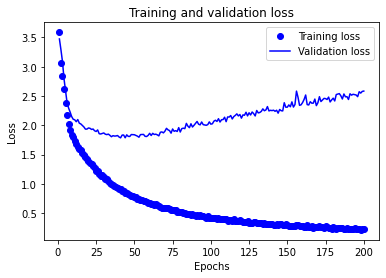

In [180]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

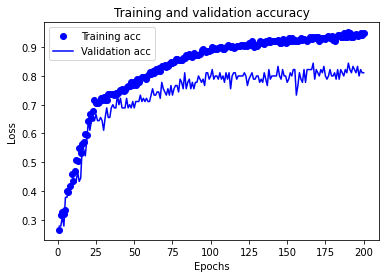

In [181]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()